# Free vibration
M C M Wright, ISVR, University of Southampton

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Notebook overview
In this notebook we'll apply what we've learned about matrices to the dynamics of vibrating systems.

A rigid body with a mass of $m\,\mbox{kg}$ mounted on a spring of stiffness $k\,\mbox{Nm}^{-1}$ and a damper with damping coefficient $c\,\mbox{Nsm}^{-1}$, and having displacement $x(t)\,\mbox{m}$ from its equilibrium at time $t\,\mbox{s}$ obeys the differential equation

$$
m\ddot{x} + c\dot{x} + kx = 0, \tag{1}
$$

where $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ with respect to time,
which it is convenient to rearrange like this

$$
\ddot{x} + \frac{c}{m}\dot{x} + \frac{k}{m}x = 0,
$$

or this

$$
\ddot{x} = - \frac{k}{m}x  -\frac{c}{m}\dot{x}.
$$

This is a second-order linear ordinary differential equation, which we'd like to solve for particular initial conditions. If any two out of the three quantities $x$, $\dot{x}$ and $\ddot{x}$ are known then the third can be obtained from ($1$), so the *state* of the system can be determined from, say, $x$ and $\dot{x}$. We'll define the *state vector*

$$
\mathbf{x} = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}
$$

and identify every point in the plane with a possible state of the system. This space is referred to as *phase-space*; state-space would be a better term for it but that has special connotations in control theory.

#### Exercise
Suppose the system was given an initial condition of $\mathbf{x}_0 = \begin{pmatrix}1 \\ 0\end{pmatrix}$, i.e. a positive (to the right) displacement with no initial velocity and was released. Sketch its subsequent trajectory in phase space? 

The time derivative of the state vector can be written

$$
\dot{\mathbf{x}} = \mathbf{Ax}.
$$

with

$$
\mathbf{A} = \begin{pmatrix} 0 & 1 \\ -k/m & -c/m \end{pmatrix}.
$$

so that

$$
\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} x \\ \dot{x} \end{pmatrix} =
\begin{pmatrix} \dot{x} \\ \ddot{x} \end{pmatrix} =
\begin{pmatrix} 0 & 1 \\ -k/m & -c/m \end{pmatrix}\begin{pmatrix} x \\ \dot{x} \end{pmatrix}.
$$

We have rewritten a second-order scalar ODE into a first-order vector ODE, and any constant-coefficient linear ODE of *any* order can be written in the form $\dot{\mathbf{x}}=\mathbf{Ax}$ in this way. We can devise a particularly crude numerical scheme to solve it as follows

$$
\mathbf{x}(t+\delta t) \approx \mathbf{x}(t) + \delta t \dot{\mathbf{x}}(t) =
\mathbf{x}(t) + \delta t \mathbf{Ax}(t)=(\mathbf{I}+\delta t\mathbf{A})\mathbf{x}(t).
$$



#### Worked example

Implement this scheme and use it to estimate the behaviour of a system with $m = 1\,\mbox{kg}$, $k=1\,\mbox{Nm}^{-1}$and $c=0.25\,\mbox{Nsm}^{-1}$ over the course  of  a minute, using  $\delta t=0.1\,\mbox{s}$.

#### Solution

(-0.80000000000000004, 1.0, -1.0, 0.80000000000000004)

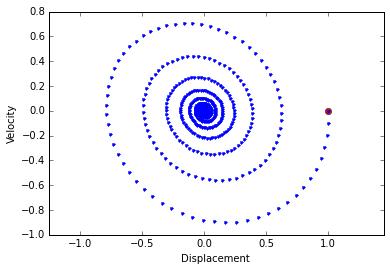

In [63]:
k = m = 1
c = 0.25
dt = 0.1
N = int(60/dt)                  # Number of time steps in a minute

x_num = matrix(zeros((2,N)))
x_num[:, 0] = matrix([[1], [0]])    # Initial conditions

A = matrix([[0, 1], [-k/m, -c/m]])
I = eye(2)

for i in range(1, N):
    x_num[:, i] = (I + dt*A)*x_num[:, i-1]

plot(x_num[0, 0], x_num[1,0], 'ro')
plot(x_num[0, :], x_num[1,:], 'b.')
xlabel('Displacement')
ylabel('Velocity')
axis('equal')

#### Exercises
1. Modify the code so that $c=2\,\mbox{Nsm}^{-1}$. Try to predict how the (estimated) trajectory will change *before* you execute the code.

2. Now set $c=0.1\,\mbox{Nsm}^{-1}$. Is the result what you would expect?

3. Repeat with $c=0.05\,\mbox{Nsm}^{-1}$. Is the predicted behaviour physically possible?

4. Repeat the previous two cases with $\delta t=0.05\,\mbox{s}$.

5. Return to the original values and modify the code so that it plots displacement as a function of time.

## Matrix exponential

We can compare this approximate solution to the exact solution. The solution of the first-order scalar ODE $\dot{x}=ax$ is  $x(t) = x_0 \mathrm{e}^{at}$. Similarly the solution to the first-order vector ODE $\dot{\mathbf{x}}=\mathbf{Ax}$ is

$$
\mathbf{x}(t) = \exp(\mathbf{A}t)\,\mathbf{x}_0,
$$

where the matrix exponential is defined in a similar manner to the regular exponential:

$$
\begin{split}
\exp\mathbf{X} &= \mathbf{I} + \mathbf{X} + \frac{1}{2}\mathbf{X}^2 + \frac{1}{6}\mathbf{X}^3 + \cdots \\
&= \sum_{k=0}^\infty \frac{\mathbf{X}^k}{k!}.
\end{split}
$$

We can see that our approximate scheme was actually a truncated expansion of the exact solution. 

#### Worked example 
Caculate the exact solution to the previous example using the matrix exponential and compare it to the numerical estimate.

#### Solution

If we call the usual NumPy `exp()` function with an array or a matrix it will take the exponential of each element in turn. To calculate the matrix exponential as defined above we need to import the liear algebra library from SciPy:

In [75]:
exp(A)

matrix([[ 1.        ,  2.71828183],
        [ 0.36787944,  0.77880078]])

In [70]:
import scipy.linalg

In [74]:
scipy.linalg.expm(A)

array([[ 0.57570896,  0.74467362],
       [-0.74467362,  0.38954055]])

(-0.80000000000000004, 1.0, -1.0, 0.80000000000000004)

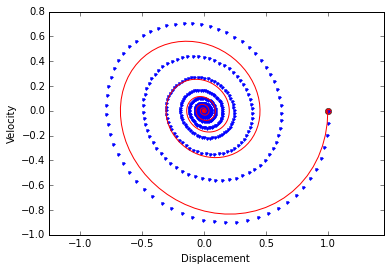

In [119]:
k = m = 1
c = 0.25
x0 = matrix([[1], [0]])    # Initial conditions

# Numerical

dt = 0.1
N = int(60/dt)                  # Number of time steps in a minute

x_num = matrix(zeros((2,N)))    # Results will be stored here
x_num[:, 0] = x0

A = matrix([[0, 1], [-k/m, -c/m]])
I = eye(2)

for i in range(1, N):
    x_num[:, i] = (I + dt*A)*x_num[:, i-1]

# Exact

t = linspace(0, 60, N)
x = matrix(zeros((2, len(t))))

for i in range(len(t)):
    x[:, i] = scipy.linalg.expm(A*t[i])*x0

# Plot both    

plot(x0[0], x0[1], 'ro')
plot(x_num[0, :], x_num[1,:], 'b.')
plot(x[0, :].T, x[1, :].T, 'r-')
xlabel('Displacement')
ylabel('Velocity')
axis('equal')

We see that the approximate method seriously underestimates the effect of the damping, because it works by approximating the true trajectory by its tangent at each point. Because the true trajectory curves inward travelling in a straight line along its tangent will always take us to a point further from the origin than the true trajectory.

#### Exercises
1. Go through the modifications you made in the previous set of exercises and compare the exact and numeric solutions.
2. Make the calculation of the numerical estimate more efficient by pre-computing the constant matrix $(\mathbf{I} + \delta t\mathbf{A})$ before the loop. 
3. Improve the acccuracy of the numerical estimate by including another term in the power series expansion of $\exp(\mathbf{A}\delta t)$.
4. Make the numerical estimate exact by setting the constant matrix to $\exp(\mathbf{A}\delta t)$.

## Outline

- Undamped 1dof
- state-space - where next?
- matrix form of equations
- eigenvalues
- matrix exponential

$$ 
m\ddot{x} = -kx
$$

$$
\ddot{x} = - \frac{k}{m}x
$$

$$
\mathbf{x} = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}
$$

State-space, what happens next?

$$
\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} x \\ \dot{x} \end{pmatrix} =
\begin{pmatrix} \dot{x} \\ \ddot{x} \end{pmatrix} =
\begin{pmatrix} 0 & 1 \\ -k/m & 0 \end{pmatrix}\begin{pmatrix} x \\ \dot{x} \end{pmatrix}.
$$

$$
\mathbf{x}(t) = \exp(\mathbf{A}t)\mathbf{x}_0,
$$

$$
\begin{split}
\exp\mathbf{X} &= \mathbf{I} + \mathbf{X} + \frac{1}{2}\mathbf{X}^2 + \frac{1}{6}\mathbf{X}^3 + \cdots \\
&= \sum_{k=0}^\infty \frac{\mathbf{X}^k}{k!}.
\end{split}
$$

\begin{split}
\mathbf{x}(t) &= \exp(\mathbf{A}t)\mathbf{x}_0, \\
&= \exp(\mathbf{VLV}^{-1}t)\mathbf{x}_0, \\
&= \left(\sum_{k=0}^\infty \frac{(\mathbf{VLV}^{-1}t)^k}{k!}\right)\mathbf{x}_0, \\
&= \mathbf{V}\left(\sum_{k=0}^\infty \frac{(\mathbf{L}t)^k}{k!}\right)\mathbf{V}^{-1}\mathbf{x}_0.
\end{split}

$$
\mathbf{L} = \begin{pmatrix}\lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix},
$$

then

$$
(\mathbf{L}t)^k = \begin{pmatrix}(\lambda_1 t)^k & 0 \\ 0 & (\lambda_2 t)^k \end{pmatrix},
$$

so that

$$
\mathbf{x}(t) = \mathbf{V}\begin{pmatrix} \mathrm{e}^{\lambda_1 t} & 0 \\ 0 & \mathrm{e}^{\lambda_1 t} \end{pmatrix} \mathbf{V}^{-1}\mathbf{x}_0.
$$

